# Nettoyage des données de Formula 1

## 1. Objectifs du Notebook
Ce notebook a pour objectif principal de préparer les données de Formula 1 en vue d’analyses approfondies. Le dataset couvre une période allant de 1950 à 2024, incluant divers aspects tels que les circuits, les pilotes, les classements, les résultats, et bien plus. Pour garantir la fiabilité des analyses, plusieurs tâches de nettoyage des données seront effectuées :

#### Validation des types de données :

- Vérifier que chaque colonne utilise un type de données approprié (numérique, catégoriel, etc.).


#### Identification et gestion des valeurs manquantes :

- Repérer les colonnes ou lignes contenant des données manquantes et appliquer des stratégies adaptées (suppression ou imputation).
  
#### Traitement des doublons :

- Vérifier l’existence de doublons dans les fichiers et les éliminer pour éviter les biais dans les analyses.

#### Gestion des incohérences :

- Identifier et corriger les éventuelles incohérences dans les données (par exemple, une valeur qui sort du bon intervalle).

Le but final est de produire un jeu de données propre, structuré et prêt pour des analyses exploratoires ou la construction de modèles de machine learning.

## 2. Importation des packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 3. Chargement des données

Pour analyser l'impact de la météo sur les performances des pilotes en Formule 1, plusieurs fichiers de données sont utilisés, chacun apportant des informations complémentaires :

- Weather(2018 - 2024).csv : Contient les données météorologiques pour chaque course, incluant des variables telles que la température, les précipitations et les conditions générales (pluie, soleil, etc.). C’est le fichier central pour l’analyse météo.
- races.csv : Fournit des informations contextuelles sur chaque course (lieu, date, etc.), nécessaires pour associer les données météo aux performances des pilotes.
- drivers.csv : Liste les pilotes, permettant d’identifier et d’évaluer leurs performances individuelles.
- results.csv : Contient les résultats détaillés des courses, notamment les positions finales, les points, les meilleurs tours, et les abandons, qui serviront à mesurer les impacts de la météo.
- status.csv : Donne des informations sur les statuts des pilotes à la fin des courses (abandon, accident, etc.), souvent affectés par la météo.

In [2]:
# Chargement des données 
meteo = pd.read_csv('Data/Weather(2018 - 2024).csv')
courses = pd.read_csv('Data/races.csv')
pilotes = pd.read_csv('Data/drivers.csv')
resultat = pd.read_csv('Data/results.csv')
status = pd.read_csv('Data/status.csv')

# Afficher les dimensions de chaque dataset
print("Dimensions de 'meteo' :", meteo.shape)
print("Dimensions de 'courses' :", courses.shape)
print("Dimensions de 'pilotes' :", pilotes.shape)
print("Dimensions de 'resultats' :", resultat.shape)
print("Dimensions de 'status' :", status.shape)

Dimensions de 'meteo' : (21859, 10)
Dimensions de 'courses' : (1125, 18)
Dimensions de 'pilotes' : (859, 9)
Dimensions de 'resultats' : (26519, 18)
Dimensions de 'status' : (139, 2)


In [3]:
resultat['rank'].unique()

array(['2', '3', '5', '7', '1', '14', '8', '4', '9', '13', '15', '16',
       '6', '11', '10', '17', '\\N', '12', '18', '19', '20', '21', '22',
       '23', '24', '0'], dtype=object)

## 4. Nettoyage de la base de données Météo

In [4]:
## Affichages des 5 premières lignes
meteo.head(5)

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,Round Number,Year
0,0 days 00:00:57.060000,24.1,36.2,997.1,False,38.2,294,3.0,1,2018
1,0 days 00:01:57.078000,24.0,36.3,997.1,False,38.6,273,1.4,1,2018
2,0 days 00:02:57.090000,24.0,36.3,997.1,False,38.6,273,1.4,1,2018
3,0 days 00:03:57.106000,23.9,37.2,997.0,False,38.7,287,2.3,1,2018
4,0 days 00:04:57.121000,24.2,35.8,997.1,False,38.7,309,3.5,1,2018


### Vérification des types des données

In [5]:
# Informations sur les colonnes
meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21859 entries, 0 to 21858
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           21859 non-null  object 
 1   AirTemp        21859 non-null  float64
 2   Humidity       21859 non-null  float64
 3   Pressure       21859 non-null  float64
 4   Rainfall       21859 non-null  bool   
 5   TrackTemp      21859 non-null  float64
 6   WindDirection  21859 non-null  int64  
 7   WindSpeed      21859 non-null  float64
 8   Round Number   21859 non-null  int64  
 9   Year           21859 non-null  int64  
dtypes: bool(1), float64(5), int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
# Conversion de la colonne Time en timedelta
meteo['Time'] = pd.to_timedelta(meteo['Time'])
# Vérification des types des colonnes
meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21859 entries, 0 to 21858
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Time           21859 non-null  timedelta64[ns]
 1   AirTemp        21859 non-null  float64        
 2   Humidity       21859 non-null  float64        
 3   Pressure       21859 non-null  float64        
 4   Rainfall       21859 non-null  bool           
 5   TrackTemp      21859 non-null  float64        
 6   WindDirection  21859 non-null  int64          
 7   WindSpeed      21859 non-null  float64        
 8   Round Number   21859 non-null  int64          
 9   Year           21859 non-null  int64          
dtypes: bool(1), float64(5), int64(3), timedelta64[ns](1)
memory usage: 1.5 MB


In [7]:
# Afficher les 5 premières lignes
meteo.head()

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,Round Number,Year
0,0 days 00:00:57.060000,24.1,36.2,997.1,False,38.2,294,3.0,1,2018
1,0 days 00:01:57.078000,24.0,36.3,997.1,False,38.6,273,1.4,1,2018
2,0 days 00:02:57.090000,24.0,36.3,997.1,False,38.6,273,1.4,1,2018
3,0 days 00:03:57.106000,23.9,37.2,997.0,False,38.7,287,2.3,1,2018
4,0 days 00:04:57.121000,24.2,35.8,997.1,False,38.7,309,3.5,1,2018


### Vérification des données manquantes

In [8]:
# Fonction qui vérifie s'il y a des valeurs manquantes dans un dataset
def check_missing_values(df, dataset_name="Dataset"):
    if df.isnull().sum().sum() == 0 :
        print(f'La base de données {dataset_name} ne contient pas des valeurs manquantes')
    else:
        print(f'La base de données {dataset_name} contient {df.isnull().sum().sum()} valeur(s) manquante(s)')

check_missing_values(meteo, 'Météo')

La base de données Météo ne contient pas des valeurs manquantes


### Vérification des doublons

In [9]:
# Fonction qui vérifie s'il y a des doublons dans un dataset
def check_duplicates(df, dataset_name="Dataset"):
    duplicates = df.duplicated().sum()  # Compter le nombre de doublons
    if duplicates > 0:
        print(f"{dataset_name} contient {duplicates} doublon(s).")
    else:
        print(f"{dataset_name} ne contient pas de doublons.")

check_duplicates(meteo, 'Météo')

Météo contient 481 doublon(s).


In [10]:
# Suppression des doublons
def remove_duplicates(df):
    return df.drop_duplicates()

meteo_cleaned = remove_duplicates(meteo)

# Vérification des la suppression des doublons
check_duplicates(meteo_cleaned, 'Météo')

Météo ne contient pas de doublons.


### Vérification des intervalles pour les colonnes numériques

In [11]:
meteo_cleaned.describe()

,Time,AirTemp,Humidity,Pressure,TrackTemp,WindDirection,WindSpeed,Round Number,Year
count,21378,21378.000000,21378.000000,21378.000000,21378.000000,21378.000000,21378.000000,21378.000000,21378.000000
mean,0 days 01:17:08.355882308,23.471181,54.709664,986.793068,35.224815,173.404107,1.637702,11.524652,2021.365656
std,0 days 00:48:51.566875113,4.988278,17.379909,50.957704,9.251853,104.043864,1.148441,6.302429,1.964110
min,0 days 00:00:02.224000,8.900000,5.000000,778.500000,13.800000,0.000000,0.000000,1.000000,2018.000000
25%,0 days 00:36:56.954000,20.000000,42.000000,986.200000,29.000000,95.000000,0.800000,6.000000,2020.000000
50%,0 days 01:13:48.357000,23.200000,55.000000,1006.600000,34.800000,170.000000,1.400000,12.000000,2022.000000
75%,0 days 01:51:26.588250,27.300000,65.775000,1013.700000,42.200000,264.000000,2.200000,17.000000,2023.000000
max,0 days 04:49:16.818000,37.200000,97.500000,1023.500000,67.000000,359.000000,10.100000,24.000000,2024.000000


Toutes les variables du dataset sont comprises dans des intervalles réalistes, à l'exception de la variable Pressure. 

Cette dernière présente des valeurs comprises entre 778 et 1023, ce qui est incohérent avec les observations météorologiques réelles. En effet, la pression atmosphérique la plus faible jamais enregistrée est de 879 hPa (source : https://alarmemeteo.ch/blog/la-pression-atmospherique-la-declencheuse-des-vents-et-des-tempetes.html). 

Étant donné que la pression atmosphérique mesurée dans le dataset présente des valeurs incohérentes, avec certaines étant inférieures à la limite minimale observée dans les conditions réelles (879 hPa), il a été décidé de ne conserver que les valeurs de pression atmosphérique égales ou supérieures à 900 hPa. Cette approche permet non seulement d'éliminer les valeurs aberrantes, mais aussi de s'assurer que l'analyse repose sur des données météorologiques réalistes.

In [12]:
# Proportion des meteo qui ont une pression alterieur inferieur à 900
(meteo['Pressure'] < 900).sum() / len(meteo) * 100

4.336886408344389

Nous constatons que Environ 15% des courses ont une pression atmospherique inférieur à 900 hPa

In [13]:
# Suppression des valeurs de pression atmosphérique < 950
meteo_cleaned = meteo_cleaned[meteo_cleaned['Pressure'] >= 900]

# Afficher les 5 premières lignes pour vérifier
meteo_cleaned.describe()

,Time,AirTemp,Humidity,Pressure,TrackTemp,WindDirection,WindSpeed,Round Number,Year
count,20430,20430.000000,20430.000000,20430.000000,20430.000000,20430.000000,20430.000000,20430.000000,20430.000000
mean,0 days 01:16:59.700136025,23.515482,55.461659,996.283607,34.937327,171.141605,1.650255,11.176407,2021.365786
std,0 days 00:48:54.688692833,5.073526,17.254360,26.185476,9.288804,103.850886,1.160239,6.228851,1.959818
min,0 days 00:00:02.224000,8.900000,5.000000,921.900000,13.800000,0.000000,0.000000,1.000000,2018.000000
25%,0 days 00:36:49.892750,19.900000,43.000000,991.000000,28.800000,93.000000,0.800000,6.000000,2020.000000
50%,0 days 01:13:33.271500,23.300000,56.000000,1007.400000,34.400000,167.000000,1.400000,11.000000,2022.000000
75%,0 days 01:51:06.292750,27.500000,66.000000,1014.000000,41.900000,256.000000,2.200000,16.000000,2023.000000
max,0 days 04:49:16.818000,37.200000,97.500000,1023.500000,67.000000,359.000000,10.100000,24.000000,2024.000000


### Enregistrement des données nettoyés dans un fichier csv

In [14]:
# Fonction qui permet d'enregistrer un dataset dans un fichier csv
def dataset_to_csv(df, name):
    df.to_csv(f'Cleaned_Data/{name}.csv', index=False)

    print(f"Les données nettoyées ont été enregistrées dans le fichier 'Cleaned_Data/{name}.csv'.")

#dataset_to_csv(meteo_cleaned, 'meteo_cleaned')

## 5. Nettoyage de la base de données Courses

### 5.1 Vérification des types de données

In [15]:
# Affichage des 5 premières lignes
courses.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


### Échantillonage des courses du 1950-2024 à 2018-2024

* Les données météorologiques que nous avons à notre disposition sont de 2018 à 2024. Ce qui nous empêche de pouvoir mener une analyse météorologique avant 2018. 

* Par conséquent, Dans la suite de ce projet nous allons nous focaliser sur les années 2018-2024.

In [16]:
# Récuperer les courses de 2018 à 2024
courses_2018_2024 = courses[(courses['year'] >= 2018) & (courses['year'] <= 2024)]

# Reindexer le dataset
courses_2018_2024 = courses_2018_2024.reset_index(drop=True)

# Afficher les 5 premières lignes
courses_2018_2024.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,989,2018,1,1,Australian Grand Prix,2018-03-25,05:10:00,http://en.wikipedia.org/wiki/2018_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,990,2018,2,3,Bahrain Grand Prix,2018-04-08,15:10:00,http://en.wikipedia.org/wiki/2018_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,991,2018,3,17,Chinese Grand Prix,2018-04-15,06:10:00,http://en.wikipedia.org/wiki/2018_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,992,2018,4,73,Azerbaijan Grand Prix,2018-04-29,12:10:00,http://en.wikipedia.org/wiki/2018_Azerbaijan_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,993,2018,5,4,Spanish Grand Prix,2018-05-13,13:10:00,http://en.wikipedia.org/wiki/2018_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


### Analyse du pertinance des variables

- Les variables ['fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'] se réfèrent principalement aux horaires des différentes sessions de la course (essais libres, qualifications, sprint, etc.), qui ne sont pas directement liées aux conditions météorologiques ayant un impact sur les performances des pilotes. Par conséquent, nous avons décidé de retirer ces variables pour simplifier l'analyse en nous concentrant sur les éléments les plus pertinents. La variable 'url' sera conservée, car elle peut être utile pour obtenir plus d'informations sur une course si nécessaire.

- En revanche, les variables 'date' et 'time' de la course restent pertinentes. Elles permettent de situer les données météorologiques dans le temps, ce qui est essentiel pour l'analyse des conditions climatiques et leur impact sur les performances des pilotes.
  
- Les variables 'year', 'round', 'circuitId' et 'name' sont également conservées car elles permettent d'identifier chaque course, la saison et le circuit associés. Ces informations sont essentielles pour relier les données météorologiques aux événements spécifiques de la compétition et pour étudier l'impact des conditions climatiques sur les performances des pilotes en fonction de l'année, du circuit et du tour de la compétition.


In [17]:
# Choix des variables pertinentes
courses_cleaned = courses_2018_2024[['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url']]
courses_cleaned.head()

,raceId,year,round,circuitId,name,date,time,url
0,989,2018,1,1,Australian Grand Prix,2018-03-25,05:10:00,http://en.wikipedia.org/wiki/2018_Australian_G...
1,990,2018,2,3,Bahrain Grand Prix,2018-04-08,15:10:00,http://en.wikipedia.org/wiki/2018_Bahrain_Gran...
2,991,2018,3,17,Chinese Grand Prix,2018-04-15,06:10:00,http://en.wikipedia.org/wiki/2018_Chinese_Gran...
3,992,2018,4,73,Azerbaijan Grand Prix,2018-04-29,12:10:00,http://en.wikipedia.org/wiki/2018_Azerbaijan_G...
4,993,2018,5,4,Spanish Grand Prix,2018-05-13,13:10:00,http://en.wikipedia.org/wiki/2018_Spanish_Gran...


### Vérification des types des données

In [18]:
# Afficher les informations sur les colonnes
courses_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   raceId     149 non-null    int64 
 1   year       149 non-null    int64 
 2   round      149 non-null    int64 
 3   circuitId  149 non-null    int64 
 4   name       149 non-null    object
 5   date       149 non-null    object
 6   time       149 non-null    object
 7   url        149 non-null    object
dtypes: int64(4), object(4)
memory usage: 9.4+ KB


In [19]:
# Fusionner les colonnes date et time et les convertir en datetime
courses_cleaned.loc[:, 'date & time'] = pd.to_datetime(courses_cleaned['date'] + ' ' + courses_cleaned['time'], format='%Y-%m-%d %H:%M:%S')

# Afficher les 5 premières lignes
courses_cleaned.head()

/var/folders/l9/dhmb1tyx1h37xyzk_tmmg0hr0000gn/T/ipykernel_5684/3020543376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  courses_cleaned.loc[:, 'date & time'] = pd.to_datetime(courses_cleaned['date'] + ' ' + courses_cleaned['time'], format='%Y-%m-%d %H:%M:%S')


,raceId,year,round,circuitId,name,date,time,url,date & time
0,989,2018,1,1,Australian Grand Prix,2018-03-25,05:10:00,http://en.wikipedia.org/wiki/2018_Australian_G...,2018-03-25 05:10:00
1,990,2018,2,3,Bahrain Grand Prix,2018-04-08,15:10:00,http://en.wikipedia.org/wiki/2018_Bahrain_Gran...,2018-04-08 15:10:00
2,991,2018,3,17,Chinese Grand Prix,2018-04-15,06:10:00,http://en.wikipedia.org/wiki/2018_Chinese_Gran...,2018-04-15 06:10:00
3,992,2018,4,73,Azerbaijan Grand Prix,2018-04-29,12:10:00,http://en.wikipedia.org/wiki/2018_Azerbaijan_G...,2018-04-29 12:10:00
4,993,2018,5,4,Spanish Grand Prix,2018-05-13,13:10:00,http://en.wikipedia.org/wiki/2018_Spanish_Gran...,2018-05-13 13:10:00


In [20]:
# Supprimer les colonnes date et time
courses_cleaned = courses_cleaned.drop(columns=['date', 'time'])

# Afficher les 5 premières lignes
courses_cleaned.head()

,raceId,year,round,circuitId,name,url,date & time
0,989,2018,1,1,Australian Grand Prix,http://en.wikipedia.org/wiki/2018_Australian_G...,2018-03-25 05:10:00
1,990,2018,2,3,Bahrain Grand Prix,http://en.wikipedia.org/wiki/2018_Bahrain_Gran...,2018-04-08 15:10:00
2,991,2018,3,17,Chinese Grand Prix,http://en.wikipedia.org/wiki/2018_Chinese_Gran...,2018-04-15 06:10:00
3,992,2018,4,73,Azerbaijan Grand Prix,http://en.wikipedia.org/wiki/2018_Azerbaijan_G...,2018-04-29 12:10:00
4,993,2018,5,4,Spanish Grand Prix,http://en.wikipedia.org/wiki/2018_Spanish_Gran...,2018-05-13 13:10:00


In [21]:
# Verification des types de données
courses_cleaned.dtypes

raceId                  int64
year                    int64
round                   int64
circuitId               int64
name                   object
url                    object
date & time    datetime64[ns]
dtype: object

### Analyse des valeurs manquantes
        

In [22]:
check_missing_values(courses_cleaned, 'Courses')

La base de données Courses ne contient pas des valeurs manquantes


### Analyse des doublons        

In [23]:
check_duplicates(courses_cleaned, 'Courses')

Courses ne contient pas de doublons.


### Enregistrement des données nettoyés dans un fichier csv

In [24]:
#dataset_to_csv(courses_cleaned, 'courses_cleaned')

## 5. Nettoyage de la base de données des pilotes

### Analyse des types de données

In [25]:
# Afficher les 5 premieres lignes
pilotes.head(5)

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


### Choix des variables pertinantes

Pour le fichier drivers.csv, seules les colonnes driverId, code, forename, surname et url seront conservées :

- Les colonnes driverId, forename et surname permettent d'identifier clairement les pilotes, ce qui est essentiel pour relier leurs performances aux données météorologiques.
- La colonne url est également utile pour obtenir des informations supplémentaires sur un pilote, si nécessaire.

Les autres colonnes ont été jugées non pertinentes pour analyser l'impact des conditions météorologiques sur les performances des pilotes :

- code s'agit généralement d'un code à trois lettres pour identifier les pilotes, principalement utilisé dans les affichages et classements, mais sans impact direct pour analyser les effets de la météo.
- driverRef est une simple référence textuelle.
- number est utilisé pour le classement ou l'affichage des pilotes lors des courses, mais n'apporte pas d'information sur leurs performances liées à la météo.
- dob (date de naissance), bien qu'elle permette de calculer l'âge, n'est pas directement corrélée avec l'impact des conditions météorologiques dans ce contexte d'analyse.
- nationality, bien qu'intéressante sur le plan descriptif, n'a pas d'influence mesurable sur les performances des pilotes en fonction des conditions climatiques.

Ces colonnes seront donc supprimées pour simplifier l'analyse et se concentrer sur les variables directement utiles.

In [26]:
# Choix des variables pertinentes
pilotes_cleaned = pilotes[['driverId','forename','surname','url']]

# Afficher les 5 premières lignes
pilotes_cleaned.head()

,driverId,forename,surname,url
0,1,Lewis,Hamilton,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,Nick,Heidfeld,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,Nico,Rosberg,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,Fernando,Alonso,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,Heikki,Kovalainen,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [27]:
# Fusionner les colonnes forename et surname
pilotes_cleaned['fullname'] = pilotes_cleaned['forename'] + ' ' + pilotes_cleaned['surname']

# Afficher les 5 premières lignes 
pilotes_cleaned.head()

/var/folders/l9/dhmb1tyx1h37xyzk_tmmg0hr0000gn/T/ipykernel_5684/876947602.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pilotes_cleaned['fullname'] = pilotes_cleaned['forename'] + ' ' + pilotes_cleaned['surname']


,driverId,forename,surname,url,fullname
0,1,Lewis,Hamilton,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
1,2,Nick,Heidfeld,http://en.wikipedia.org/wiki/Nick_Heidfeld,Nick Heidfeld
2,3,Nico,Rosberg,http://en.wikipedia.org/wiki/Nico_Rosberg,Nico Rosberg
3,4,Fernando,Alonso,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando Alonso
4,5,Heikki,Kovalainen,http://en.wikipedia.org/wiki/Heikki_Kovalainen,Heikki Kovalainen


In [28]:
# Supprimer les colonnes forename et surname
pilotes_cleaned = pilotes_cleaned.drop(columns=['forename', 'surname'])

# Afficher les 5 premières lignes
pilotes_cleaned.head()

,driverId,url,fullname
0,1,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
1,2,http://en.wikipedia.org/wiki/Nick_Heidfeld,Nick Heidfeld
2,3,http://en.wikipedia.org/wiki/Nico_Rosberg,Nico Rosberg
3,4,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando Alonso
4,5,http://en.wikipedia.org/wiki/Heikki_Kovalainen,Heikki Kovalainen


### Vérification du type des données

In [29]:
pilotes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859 entries, 0 to 858
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   driverId  859 non-null    int64 
 1   url       859 non-null    object
 2   fullname  859 non-null    object
dtypes: int64(1), object(2)
memory usage: 20.3+ KB


### Analyse des valeurs manquantes

In [30]:
check_missing_values(pilotes_cleaned, 'pilotes_cleaned')

La base de données pilotes_cleaned ne contient pas des valeurs manquantes


### Analyse des doublons

In [31]:
check_duplicates(pilotes_cleaned, 'pilotes_cleaned')

pilotes_cleaned ne contient pas de doublons.


### Enregistrement des données nettoyés dans un fichier csv

In [32]:
#dataset_to_csv(pilotes_cleaned, 'pilotes_cleaned')

## 6. Nettoyae des données des resultats des courses

### Vérification des types de données

In [33]:
# Afficher les 5 premières ligne
resultat.head(5)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [34]:
# Description des types de données
resultat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26519 entries, 0 to 26518
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26519 non-null  int64  
 1   raceId           26519 non-null  int64  
 2   driverId         26519 non-null  int64  
 3   constructorId    26519 non-null  int64  
 4   number           26519 non-null  object 
 5   grid             26519 non-null  int64  
 6   position         26519 non-null  object 
 7   positionText     26519 non-null  object 
 8   positionOrder    26519 non-null  int64  
 9   points           26519 non-null  float64
 10  laps             26519 non-null  int64  
 11  time             26519 non-null  object 
 12  milliseconds     26519 non-null  object 
 13  fastestLap       26519 non-null  object 
 14  rank             26519 non-null  object 
 15  fastestLapTime   26519 non-null  object 
 16  fastestLapSpeed  26519 non-null  object 
 17  statusId    

### Échantillonage des resultats du 1950-2024 à 2018-2024

In [35]:
# Récuperer les résultats de 2018 à 2024
resultat_2018_2024 = resultat[(resultat['raceId'] >= courses_cleaned['raceId'].min()) & (resultat['raceId'] <= courses_cleaned['raceId'].max())]

# Reindexer le dataset
resultat_2018_2024 = resultat_2018_2024.reset_index(drop=True)

# Afficher les 5 premières lignes
resultat_2018_2024.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,23782,989,20,6,5,3,1,1,1,25.0,58,1:29:33.283,5373283,53,4,1:26.469,220.782,1
1,23783,989,1,131,44,1,2,2,2,18.0,58,+5.036,5378319,50,3,1:26.444,220.845,1
2,23784,989,8,6,7,2,3,3,3,15.0,58,+6.309,5379592,57,2,1:26.373,221.027,1
3,23785,989,817,9,3,8,4,4,4,12.0,58,+7.069,5380352,54,1,1:25.945,222.128,1
4,23786,989,4,1,14,10,5,5,5,10.0,58,+27.886,5401169,57,7,1:26.978,219.489,1


In [36]:
resultat_2018_2024['rank'].unique()

array(['4', '3', '2', '1', '7', '5', '9', '8', '6', '12', '11', '10',
       '15', '14', '13', '16', '17', '18', '19', '20', '0'], dtype=object)

### Analyse des valeurs prises par les differentes variables

#### Analyse des variables quantitatives

In [37]:
resultat_2018_2024.describe()

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId
count,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000
mean,25154.359620,1059.882074,689.560789,80.225265,10.076670,10.496532,5.071376,54.529390,9.265060
std,791.739487,42.226964,313.249402,87.702182,5.823302,5.765528,7.222459,17.428476,21.690966
min,23782.000000,989.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,24470.500000,1023.000000,815.000000,5.000000,5.000000,5.500000,0.000000,51.000000,1.000000
50%,25155.000000,1060.000000,832.000000,15.000000,10.000000,10.000000,0.500000,56.000000,1.000000
75%,25839.500000,1096.000000,845.000000,210.000000,15.000000,15.000000,9.000000,67.000000,11.000000
max,26524.000000,1132.000000,860.000000,215.000000,20.000000,20.000000,26.000000,87.000000,141.000000


#### Analyse des variables catégorielles

In [38]:
resultat_2018_2024.describe(include = 'object')

,number,position,positionText,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed
count,2739,2739,2739,2739,2739,2739,2739,2739,2739
unique,38,21,23,1516,1520,79,21,2519,2562
top,10,\N,R,\N,\N,\N,4,\N,\N
freq,137,376,358,1219,1219,126,135,126,126


### Sélection des variables pertinantes

Pour analyser l’impact de la météo sur les performances des pilotes, seules les variables directement liées aux résultats et aux performances des courses seront retenues :

- resultId, raceId, driverId : Identifiants nécessaires pour relier les performances aux courses, pilotes, et conditions météo.
- positionOrder : Représente le classement final, indicateur clé de performance.
- points : Évalue le succès global des pilotes sous différentes conditions météorologiques.
- laps : Indique le nombre de tours complétés, utile pour détecter les abandons liés aux conditions.
- fastestLapTime, fastestLapSpeed : Mesures de performance maximale, permettant d'évaluer l'impact des conditions météo sur la vitesse.
- statusId : Permet de suivre les abandons ou incidents, souvent influencés par la météo.

Exclusion des autres variables : Les variables comme grid, milliseconds, ou rank sont redondantes ou moins pertinentes pour évaluer directement l’influence de la météo. Des colonnes purement techniques (ex. : number, constructorId) n’apportent pas de valeur analytique pour cet objectif spécifique.


In [39]:
resultat_cleaned = resultat_2018_2024[['resultId', 'raceId', 'driverId', 'positionOrder', 'points', 'time', 'milliseconds', 'laps', 'fastestLapTime', 'rank', 'fastestLapSpeed', 'statusId']]

resultat_cleaned.head()

,resultId,raceId,driverId,positionOrder,points,time,milliseconds,laps,fastestLapTime,rank,fastestLapSpeed,statusId
0,23782,989,20,1,25.0,1:29:33.283,5373283,58,1:26.469,4,220.782,1
1,23783,989,1,2,18.0,+5.036,5378319,58,1:26.444,3,220.845,1
2,23784,989,8,3,15.0,+6.309,5379592,58,1:26.373,2,221.027,1
3,23785,989,817,4,12.0,+7.069,5380352,58,1:25.945,1,222.128,1
4,23786,989,4,5,10.0,+27.886,5401169,58,1:26.978,7,219.489,1


### Formatage des types de colonnes

In [40]:
# Convertir la variable time en timedelta

# Créer une copie du DataFrame pour éviter le SettingWithCopyWarning
resultat_cleaned = resultat_cleaned.copy()

# Remplacer les '\N' par NaN (valeur manquante) dans la colonne 'milliseconds'
resultat_cleaned.loc[:, 'milliseconds'] = resultat_cleaned['milliseconds'].replace(r'\\N', np.nan, regex=True)

# Fonction pour convertir les millisecondes en timedelta
def convert_to_timedelta(ms_value):
    try:
        if pd.isna(ms_value):  # Vérifier si la valeur est NaN
            return np.nan
        
        # Vérifier si la valeur est une chaîne de caractères qui peut être convertie en entier
        ms_value = str(ms_value)  # Convertir la valeur en chaîne pour s'assurer qu'on peut la traiter
        if ms_value.isdigit():
            # Convertir les millisecondes en timedelta (valeur en ms)
            return pd.to_timedelta(int(ms_value), unit='ms')
        else:
            return np.nan  # Retourner NaN si la valeur ne peut pas être convertie en entier
    except Exception as e:
        return np.nan  # Si la conversion échoue, retourner NaN

# Appliquer la fonction de conversion à la colonne 'milliseconds' et créer une nouvelle colonne 'RaceTime'
resultat_cleaned.loc[:, 'time_'] = resultat_cleaned['milliseconds'].apply(convert_to_timedelta)

# Vérifier les premières lignes après la conversion
resultat_cleaned.head()

,resultId,raceId,driverId,positionOrder,points,time,milliseconds,laps,fastestLapTime,rank,fastestLapSpeed,statusId,time_
0,23782,989,20,1,25.0,1:29:33.283,5373283,58,1:26.469,4,220.782,1,0 days 01:29:33.283000
1,23783,989,1,2,18.0,+5.036,5378319,58,1:26.444,3,220.845,1,0 days 01:29:38.319000
2,23784,989,8,3,15.0,+6.309,5379592,58,1:26.373,2,221.027,1,0 days 01:29:39.592000
3,23785,989,817,4,12.0,+7.069,5380352,58,1:25.945,1,222.128,1,0 days 01:29:40.352000
4,23786,989,4,5,10.0,+27.886,5401169,58,1:26.978,7,219.489,1,0 days 01:30:01.169000


In [41]:
# Convertir la variable fastestLapTime en timedelta

# Créer une copie du DataFrame pour éviter les problèmes de vue
resultat_cleaned = resultat_cleaned.copy()

# Remplacer les valeurs '\\N' par NaN
resultat_cleaned.loc[:, 'fastestLapTime'] = resultat_cleaned['fastestLapTime'].replace(r'\\N', np.nan, regex=True)

# Fonction pour convertir les durées de type "1:26.469"
def convert_fastest_lap_time(lap_time):
    if pd.isna(lap_time):
        return np.nan
    
    # Diviser en minutes et secondes
    time_parts = lap_time.split(':')
    if len(time_parts) != 2:
        return np.nan  # Si la structure n'est pas correcte, retourner NaN
    
    minutes = time_parts[0]
    seconds = time_parts[1]
    
    # Convertir en total de secondes
    total_seconds = int(minutes) * 60 + float(seconds)
    
    return pd.to_timedelta(total_seconds, unit='s')

# Appliquer la conversion à la colonne 'fastestLapTime' en utilisant .loc
resultat_cleaned.loc[:, 'fastestLapTime_'] = resultat_cleaned['fastestLapTime'].apply(convert_fastest_lap_time)

# Vérifier les premières lignes après la conversion
resultat_cleaned.head()

,resultId,raceId,driverId,positionOrder,points,time,milliseconds,laps,fastestLapTime,rank,fastestLapSpeed,statusId,time_,fastestLapTime_
0,23782,989,20,1,25.0,1:29:33.283,5373283,58,1:26.469,4,220.782,1,0 days 01:29:33.283000,0 days 00:01:26.469000
1,23783,989,1,2,18.0,+5.036,5378319,58,1:26.444,3,220.845,1,0 days 01:29:38.319000,0 days 00:01:26.444000
2,23784,989,8,3,15.0,+6.309,5379592,58,1:26.373,2,221.027,1,0 days 01:29:39.592000,0 days 00:01:26.373000
3,23785,989,817,4,12.0,+7.069,5380352,58,1:25.945,1,222.128,1,0 days 01:29:40.352000,0 days 00:01:25.945000
4,23786,989,4,5,10.0,+27.886,5401169,58,1:26.978,7,219.489,1,0 days 01:30:01.169000,0 days 00:01:26.978000


In [42]:
# Convertir la variable fastestLapSpeed en numéric

# Créer une copie du DataFrame pour éviter les problèmes de vue
resultat_cleaned = resultat_cleaned.copy()

# Remplacer les '\N' par NaN dans la colonne 'fastestLapSpeed'
resultat_cleaned['fastestLapSpeed'] = resultat_cleaned['fastestLapSpeed'].replace(r'\\N', np.nan, regex=True)

# Convertir la colonne 'fastestLapSpeed' en type float
resultat_cleaned['fastestLapSpeed_'] = pd.to_numeric(resultat_cleaned['fastestLapSpeed'], errors='coerce')

# Vérifier le type et les premières lignes
resultat_cleaned.head()

,resultId,raceId,driverId,positionOrder,points,time,milliseconds,laps,fastestLapTime,rank,fastestLapSpeed,statusId,time_,fastestLapTime_,fastestLapSpeed_
0,23782,989,20,1,25.0,1:29:33.283,5373283,58,1:26.469,4,220.782,1,0 days 01:29:33.283000,0 days 00:01:26.469000,220.782
1,23783,989,1,2,18.0,+5.036,5378319,58,1:26.444,3,220.845,1,0 days 01:29:38.319000,0 days 00:01:26.444000,220.845
2,23784,989,8,3,15.0,+6.309,5379592,58,1:26.373,2,221.027,1,0 days 01:29:39.592000,0 days 00:01:26.373000,221.027
3,23785,989,817,4,12.0,+7.069,5380352,58,1:25.945,1,222.128,1,0 days 01:29:40.352000,0 days 00:01:25.945000,222.128
4,23786,989,4,5,10.0,+27.886,5401169,58,1:26.978,7,219.489,1,0 days 01:30:01.169000,0 days 00:01:26.978000,219.489


In [43]:
resultat_cleaned.dtypes

resultId                      int64
raceId                        int64
driverId                      int64
positionOrder                 int64
points                      float64
time                         object
milliseconds                 object
laps                          int64
fastestLapTime               object
rank                         object
fastestLapSpeed              object
statusId                      int64
time_               timedelta64[ns]
fastestLapTime_     timedelta64[ns]
fastestLapSpeed_            float64
dtype: object

In [44]:
resultat_cleaned.describe()

,resultId,raceId,driverId,positionOrder,points,laps,statusId,time_,fastestLapTime_,fastestLapSpeed_
count,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,1520,2613,2613.000000
mean,25154.359620,1059.882074,689.560789,10.496532,5.071376,54.529390,9.265060,0 days 01:37:17.400503289,0 days 00:01:28.217748947,210.585246
std,791.739487,42.226964,313.249402,5.765528,7.222459,17.428476,21.690966,0 days 00:21:26.208374651,0 days 00:00:11.811074568,19.995504
min,23782.000000,989.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0 days 00:03:27.071000,0 days 00:00:55.404000,128.135000
25%,24470.500000,1023.000000,815.000000,5.500000,0.000000,51.000000,1.000000,0 days 01:27:45.568250,0 days 00:01:19.074000,200.035000
50%,25155.000000,1060.000000,832.000000,10.000000,0.500000,56.000000,1.000000,0 days 01:33:25.518000,0 days 00:01:28.249000,210.893000
75%,25839.500000,1096.000000,845.000000,15.000000,9.000000,67.000000,11.000000,0 days 01:41:07.538000,0 days 00:01:37.037000,225.135000
max,26524.000000,1132.000000,860.000000,20.000000,26.000000,87.000000,141.000000,0 days 03:03:32.095000,0 days 00:02:14.103000,255.014000


In [45]:
# Supprimer les variables redondantes
resultat_cleaned = resultat_cleaned.drop(columns=['time', 'milliseconds', 'fastestLapTime', 'fastestLapSpeed'])

# Vérifier les colonnes restantes
print(resultat_cleaned.dtypes)
resultat_cleaned.head()

resultId                      int64
raceId                        int64
driverId                      int64
positionOrder                 int64
points                      float64
laps                          int64
rank                         object
statusId                      int64
time_               timedelta64[ns]
fastestLapTime_     timedelta64[ns]
fastestLapSpeed_            float64
dtype: object


,resultId,raceId,driverId,positionOrder,points,laps,rank,statusId,time_,fastestLapTime_,fastestLapSpeed_
0,23782,989,20,1,25.0,58,4,1,0 days 01:29:33.283000,0 days 00:01:26.469000,220.782
1,23783,989,1,2,18.0,58,3,1,0 days 01:29:38.319000,0 days 00:01:26.444000,220.845
2,23784,989,8,3,15.0,58,2,1,0 days 01:29:39.592000,0 days 00:01:26.373000,221.027
3,23785,989,817,4,12.0,58,1,1,0 days 01:29:40.352000,0 days 00:01:25.945000,222.128
4,23786,989,4,5,10.0,58,7,1,0 days 01:30:01.169000,0 days 00:01:26.978000,219.489


Les colonnes de type date ont bien été formatées.

### Analyses des valeurs manquantes

In [46]:
check_missing_values(resultat_cleaned, 'resultat_cleaned')

La base de données resultat_cleaned contient 1471 valeur(s) manquante(s)


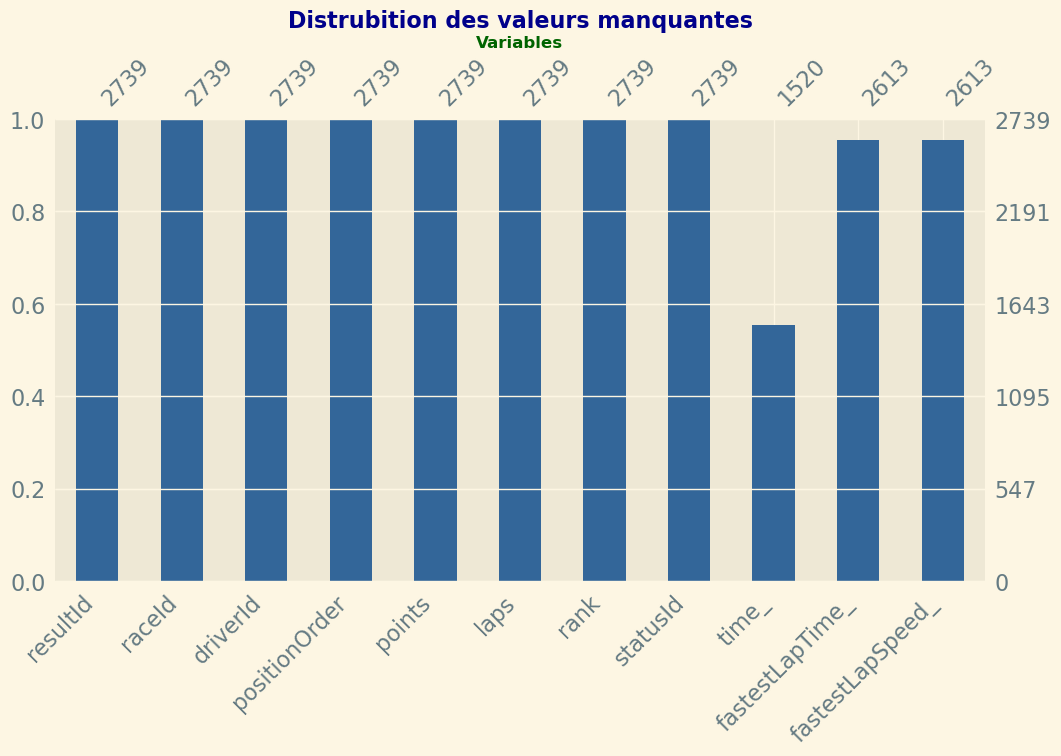

                  Missing Values  Percentage
resultId                       0    0.000000
raceId                         0    0.000000
driverId                       0    0.000000
positionOrder                  0    0.000000
points                         0    0.000000
laps                           0    0.000000
rank                           0    0.000000
statusId                       0    0.000000
time_                       1219   44.505294
fastestLapTime_              126    4.600219
fastestLapSpeed_             126    4.600219


In [47]:
import matplotlib.pyplot as plt
import missingno as msno

# Appliquer un style général
plt.style.use('Solarize_Light2')  # Utiliser un style pré-défini

# Créer le graphique avec missingno
msno.bar(resultat_cleaned, color=(0.2, 0.4, 0.6), figsize=(12, 6))  # Choisir une couleur spécifique et une taille

# Ajouter un titre personnalisé
plt.title('Distrubition des valeurs manquantes', fontsize=16, fontweight='bold', color='darkblue')

# Ajouter un label aux axes
plt.xlabel('Variables', fontsize=12, fontweight='bold', color='darkgreen')
plt.ylabel('Valeurs manquantes', fontsize=12, fontweight='bold', color='darkgreen')

# Afficher le graphique
plt.show()

# Tableau des valeurs manquantes par colonne
missing_values = resultat_cleaned.isnull().sum()
missing_percent = (missing_values / len(resultat_cleaned)) * 100
missing_table = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_table)

Le dataset présente peu de valeurs manquantes pour la plupart des variables, mais certaines colonnes comme time_ (44,5% manquantes), fastestLapTime_ et fastestLapSpeed_ (chacune avec 4,6% manquantes) contiennent des données absentes. 

Cela pourrait être dû à des situations où certains pilotes n'ont pas enregistré de temps ou de vitesse pour certains tours. Une gestion des valeurs manquantes est nécessaire pour assurer la fiabilité de l'analyse.

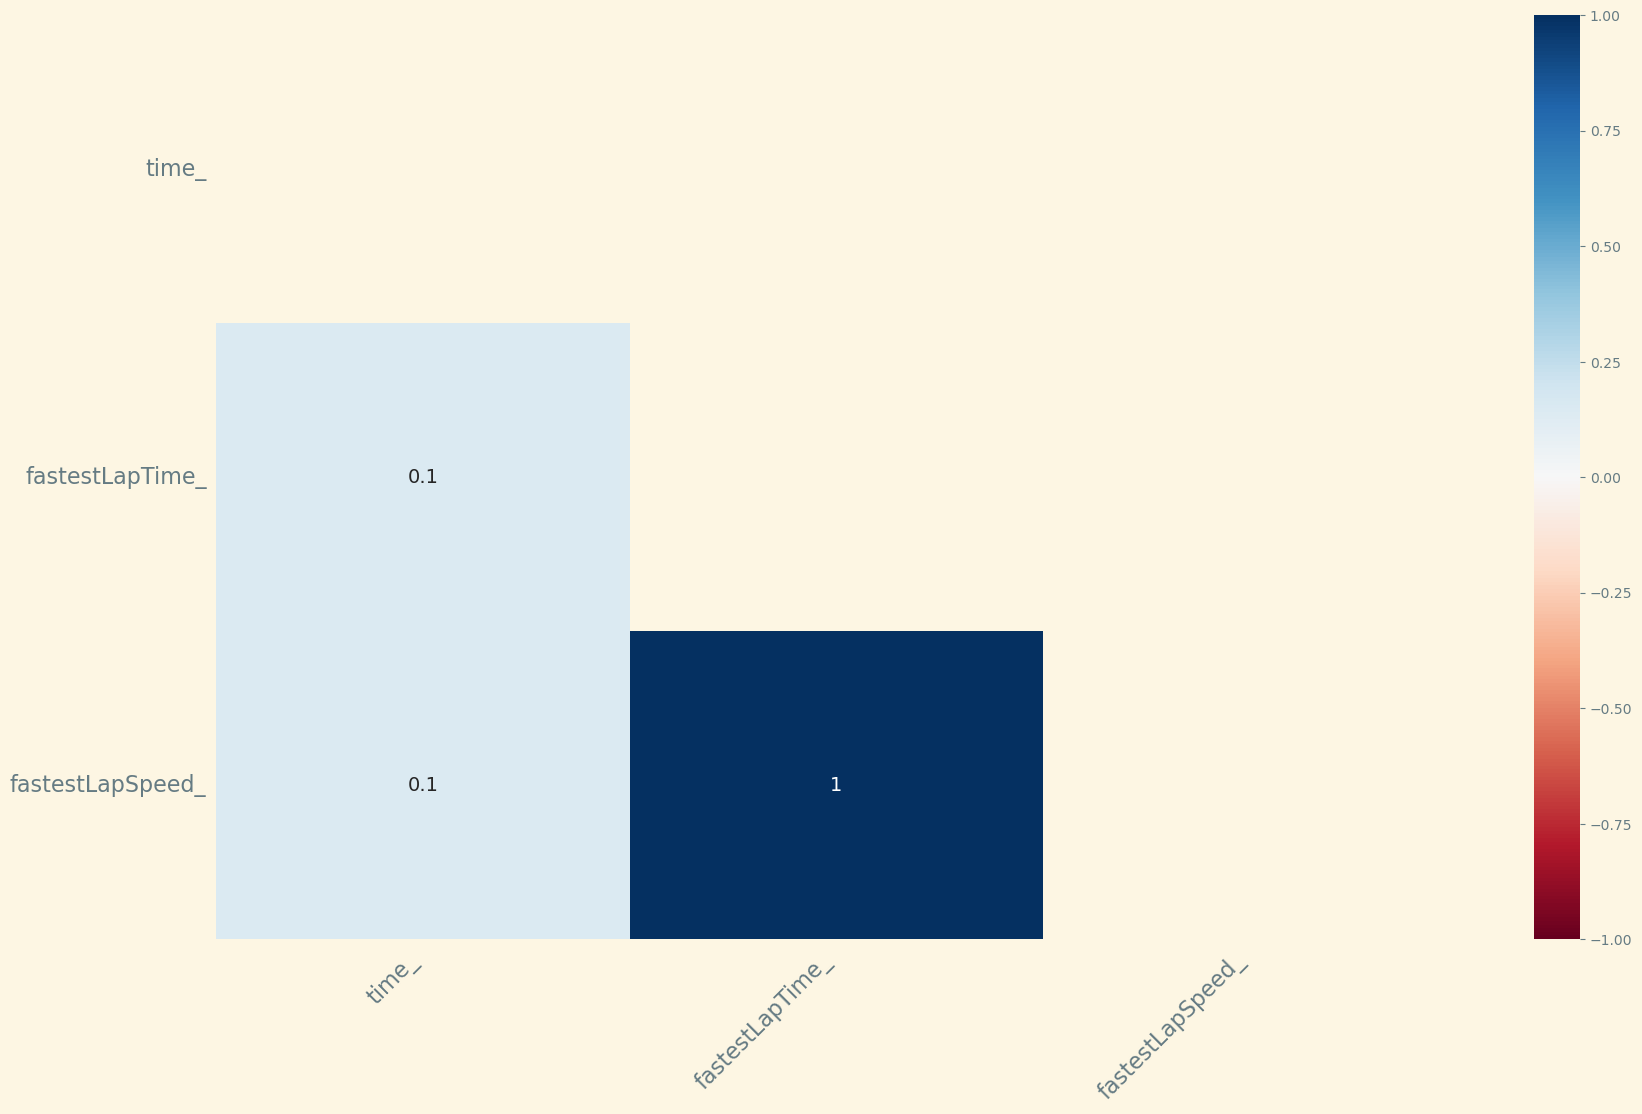

In [48]:
# Analyser la corrélation entre les valeurs manquantes
msno.heatmap(resultat_cleaned)
plt.show()

#### Identification des valeurs manquantes
Dans notre le dataset des resultats, certaines colonnes telles que time_, fastestLapSpeed_, et fastestLapTime_ contiennent des valeurs manquantes (NaN). La corrélation des valeurs manquantes entre fastestLapTime_ et fastestLapSpeed_ suggère que lorsqu'un pilote n'a pas de temps de tour enregistré, il n'a également pas de vitesse de tour, ce qui justifie la corrélation des valeurs manquantes entre ces deux variables.

Ces valeurs manquantes sont dues à des situations spécifiques dans la réalité des courses de Formule 1, principalement :

- Course non terminée : Certaines courses ne se terminent pas pour diverses raisons, telles qu'un accident, une panne de véhicule, ou des conditions de course extrêmes. Dans ces cas, les temps associés à ces courses ne sont pas enregistrés, d'où des valeurs manquantes.

- Pilote non terminé : Il est possible qu'un pilote n'ait pas terminé la course pour des raisons similaires, comme un abandon ou un accident. Si un pilote abandonne, ses temps de course et de tour (y compris le meilleur temps au tour) ne sont pas disponibles.

#### Gestion des valeurs manquantes
Nous avons pris des décisions réfléchies concernant la gestion des valeurs manquantes dans notre dataset en fonction des caractéristiques des variables et de leur impact potentiel sur nos analyses futures.

- Variables fastestLapTime_ et fastestLapSpeed_ :
Pour ces deux variables, qui contiennent respectivement 4% de valeurs manquantes, nous avons opté pour un remplacement par la moyenne. Cette approche a été choisie car la fréquence des valeurs manquantes est relativement faible, et la moyenne semble être une valeur représentative des observations disponibles. Cela nous permet de conserver un dataset complet pour l’analyse tout en évitant de biaiser les résultats, tout en respectant la logique que ces variables sont censées être observées pour chaque course.

- Variable time_ :
En revanche, la variable time_ présente un pourcentage de valeurs manquantes beaucoup plus élevé (44%), ce qui est considérable. Plutôt que de la remplacer, nous avons décidé de garder les valeurs manquantes pour cette variable. Cette absence de données pourrait être liée à des circonstances spécifiques, comme des courses non terminées, des abandons ou des problèmes techniques. Nous souhaitons donc explorer si ces valeurs manquantes sont associées à certains status de courses (abandon, panne, etc.) ou à des conditions météorologiques spécifiques. Cette analyse pourrait enrichir notre compréhension des facteurs influençant la durée des courses.

In [49]:
# Remplacer les valeurs manquantes par la moyenne des colonnes
resultat_cleaned['fastestLapTime_'].fillna(resultat_cleaned['fastestLapTime_'].mean(), inplace=True)
resultat_cleaned['fastestLapSpeed_'].fillna(resultat_cleaned['fastestLapSpeed_'].mean(), inplace=True)

### Analyses des doublons

In [50]:
check_duplicates(resultat_cleaned, 'resultat_cleaned')

resultat_cleaned ne contient pas de doublons.


### Enregistrement des données nettoyés dans un fichier csv

In [51]:
#dataset_to_csv(resultat_cleaned, 'resultat_cleaned')

## 7. Nettoyage de la base de données status

### Vérification des types de données

In [52]:
# Afficher les premières lignes
status.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [53]:
## Afficher les informations sur les variables
status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   statusId  139 non-null    int64 
 1   status    139 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


### Analyse des valeurs manquantes

In [54]:
check_missing_values(status, 'status')

La base de données status ne contient pas des valeurs manquantes


### Analyse des doublons

In [55]:
check_duplicates(status, 'status')

status ne contient pas de doublons.


### Affichage des differents status

In [56]:
print(status['status'].unique().shape[0])
print(status['status'].unique())

139
['Finished' 'Disqualified' 'Accident' 'Collision' 'Engine' 'Gearbox'
 'Transmission' 'Clutch' 'Hydraulics' 'Electrical' '+1 Lap' '+2 Laps'
 '+3 Laps' '+4 Laps' '+5 Laps' '+6 Laps' '+7 Laps' '+8 Laps' '+9 Laps'
 'Spun off' 'Radiator' 'Suspension' 'Brakes' 'Differential' 'Overheating'
 'Mechanical' 'Tyre' 'Driver Seat' 'Puncture' 'Driveshaft' 'Retired'
 'Fuel pressure' 'Front wing' 'Water pressure' 'Refuelling' 'Wheel'
 'Throttle' 'Steering' 'Technical' 'Electronics' 'Broken wing'
 'Heat shield fire' 'Exhaust' 'Oil leak' '+11 Laps' 'Wheel rim'
 'Water leak' 'Fuel pump' 'Track rod' '+17 Laps' 'Oil pressure' '+42 Laps'
 '+13 Laps' 'Withdrew' '+12 Laps' 'Engine fire' 'Engine misfire'
 '+26 Laps' 'Tyre puncture' 'Out of fuel' 'Wheel nut' 'Not classified'
 'Pneumatics' 'Handling' 'Rear wing' 'Fire' 'Wheel bearing' 'Physical'
 'Fuel system' 'Oil line' 'Fuel rig' 'Launch control' 'Injured' 'Fuel'
 'Power loss' 'Vibrations' '107% Rule' 'Safety' 'Drivetrain' 'Ignition'
 'Did not qualify' 'Inj

### Enregistrement des données nettoyés dans un fichier csv

In [57]:
#dataset_to_csv(status, 'status_cleaned')